# Linear Regression

The code is obtained from a Udemy course (PyTorch: Deep Learning and Artificial Intelligence).

The code is also complementary to notes found in Obsidian.

In [89]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [90]:
# constants (model will try to predict these values)
N = 20
m = 0.5
b = -2

In [91]:
# generate random data of size N
X = np.random.random(N) * 10 - 5
Y = m * X + b + np.random.randn(N) # Gaussian noise added to the Y values

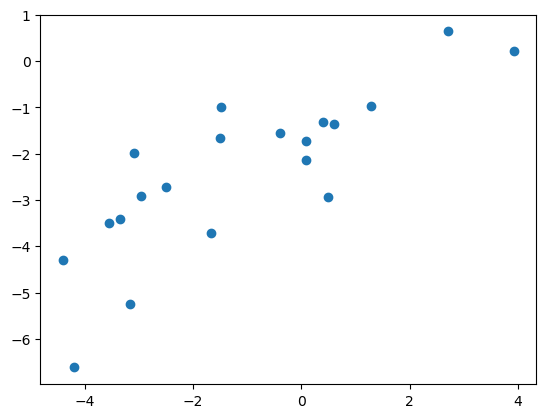

In [92]:
# plot the data
f = plt.scatter(X, Y)

In [93]:
# create a linear regression model
model = nn.Linear(1, 1)

# define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [94]:
# reshape the data to be `num_samples` by `num_dimensions`
X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

# cast the data type to float32 (PyTorch uses float32 by default; numpy uses float64)
inputs = torch.from_numpy(X.astype(np.float32)) # X = torch.from_numpy(X).type(torch.FloatTensor)
target = torch.from_numpy(Y.astype(np.float32)) # Y = torch.from_numpy(Y).type(torch.FloatTensor)

In [95]:
print("INPUTS:", type(inputs))
print("TARGET:", type(target))

INPUTS: <class 'torch.Tensor'>
TARGET: <class 'torch.Tensor'>


Both `inputs` and `target` variables are of type `torch.Tensor`.

In [96]:
# train the model
num_epochs = 30
losses = []
for it in range(num_epochs):
    # zero the parameter gradients
    optimizer.zero_grad()

    # forward pass
    outputs = model(inputs)
    loss = criterion(outputs, target)

    # store losses in an array for plotting
    losses.append(loss.item())

    # backward pass
    loss.backward()
    optimizer.step()

    print(f'Epoch {it + 1}/{num_epochs}, Loss: {loss.item():.4f}')
    

Epoch 1/30, Loss: 23.6984
Epoch 2/30, Loss: 18.6896
Epoch 3/30, Loss: 14.9044
Epoch 4/30, Loss: 12.0399
Epoch 5/30, Loss: 9.8681
Epoch 6/30, Loss: 8.2177
Epoch 7/30, Loss: 6.9599
Epoch 8/30, Loss: 5.9977
Epoch 9/30, Loss: 5.2582
Epoch 10/30, Loss: 4.6868
Epoch 11/30, Loss: 4.2422
Epoch 12/30, Loss: 3.8933
Epoch 13/30, Loss: 3.6168
Epoch 14/30, Loss: 3.3953
Epoch 15/30, Loss: 3.2155
Epoch 16/30, Loss: 3.0674
Epoch 17/30, Loss: 2.9437
Epoch 18/30, Loss: 2.8385
Epoch 19/30, Loss: 2.7477
Epoch 20/30, Loss: 2.6681
Epoch 21/30, Loss: 2.5972
Epoch 22/30, Loss: 2.5333
Epoch 23/30, Loss: 2.4748
Epoch 24/30, Loss: 2.4208
Epoch 25/30, Loss: 2.3705
Epoch 26/30, Loss: 2.3233
Epoch 27/30, Loss: 2.2786
Epoch 28/30, Loss: 2.2362
Epoch 29/30, Loss: 2.1957
Epoch 30/30, Loss: 2.1569


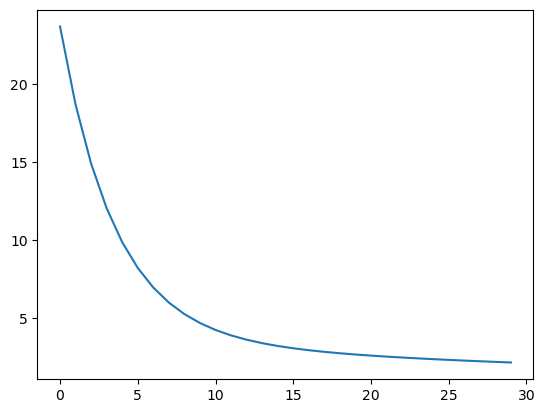

In [97]:
# plot the loss
plt.plot(losses)

A decreasing (fast start, slow end) curve is **ideal** when training machine learning models. 

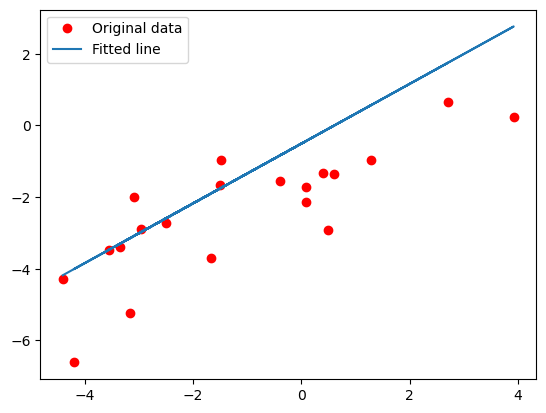

In [98]:
# prediction and plot
predicted = model(inputs).detach().numpy() # detach the tensor
plt.plot(X, Y, 'ro', label = 'Original data')
plt.plot(X, predicted, label = 'Fitted line')
plt.legend()
plt.show()

Alternative way to make predictions without gradients is shown below.

In [99]:
with torch.no_grad():
    out = model(inputs).numpy()
print(out, type(out))

[[-4.1835093 ]
 [-0.43249592]
 [-2.9840722 ]
 [-3.0921483 ]
 [-3.3078523 ]
 [-1.7420907 ]
 [-0.10553837]
 [ 2.7593322 ]
 [-0.8348646 ]
 [-0.17936432]
 [ 0.55720854]
 [-3.4694438 ]
 [-0.44512856]
 [-1.7549596 ]
 [-3.14247   ]
 [ 1.7484342 ]
 [-0.01060951]
 [-4.013406  ]
 [-1.8936592 ]
 [-2.5969534 ]] <class 'numpy.ndarray'>


Inspect the parameters of the model to see if they match the original settings.
- slope `m` $\rightarrow$ weight `w`
- intercept `b` $\rightarrow$ bias `b`

In this example, the original weight and bias is already known.

In [100]:
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w, b)

[[0.8328572]] [-0.508989]
